In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
 

In [13]:
customers = pd.read_csv('customers.xlc')
customers.head()

Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0    Male           No   22        No     Healthcare              1.0   
1  Female          Yes   38       Yes       Engineer              NaN   
2  Female          Yes   67       Yes       Engineer              1.0   
3    Male          Yes   67       Yes         Lawyer              0.0   
4  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size Segmentation  
0            Low          4.0            D  
1        Average          3.0            A  
2            Low          1.0            B  
3           High          2.0            B  
4           High          6.0            A

In [ ]:
customers.describe()

Age  Work_Experience  Family_Size
count  8068.000000      7239.000000  7733.000000
mean     43.466906         2.641663     2.850123
std      16.711696         3.406763     1.531413
min      18.000000         0.000000     1.000000
25%      30.000000         0.000000     2.000000
50%      40.000000         1.000000     3.000000
75%      53.000000         4.000000     4.000000
max      89.000000        14.000000     9.000000

# first Question

In [ ]:
more_men_segment_name = customers.loc[(customers.Gender == 'Male')].Segmentation.value_counts().head(1)
more_men_segment_name

D    1309
Name: Segmentation, dtype: int64

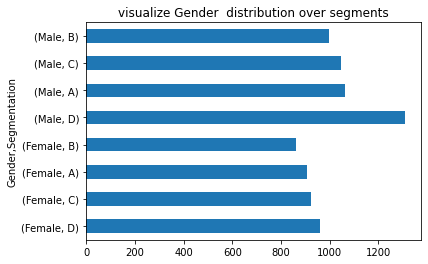

In [ ]:
# plot a chart that visualize gender distribution over segments
marital_distribution = customers.groupby('Gender').Segmentation.value_counts().plot(kind='barh',title="visualize Gender  distribution over segments")

In [ ]:
# Which segment contains higher Married customers? And which contains higher single ones?
higher_Ever_Married_segment = customers.groupby('Ever_Married')['Segmentation'].apply(lambda s : s.value_counts().head(1))
higher_Ever_Married_segment



Ever_Married   
No            D    1607
Yes           C    1549
Name: Segmentation, dtype: int64

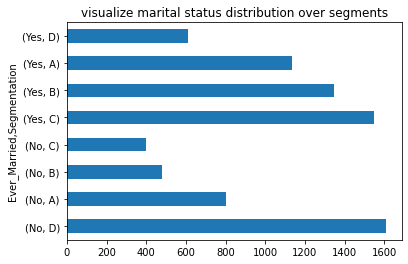

In [ ]:
# plot a chart that visualize marital status distribution over segments.

marital_distribution = customers.groupby('Ever_Married').Segmentation.value_counts().plot(kind='barh',title="visualize marital status distribution over segments")


<AxesSubplot:xlabel='Age', ylabel='Count'>

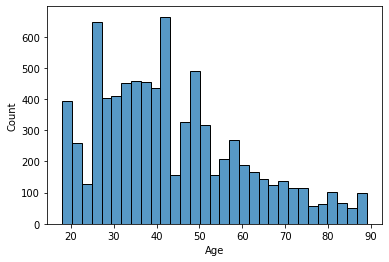

In [ ]:
# plot a chart that visualize the age histogram, and one that visualize Work Experience
sns.histplot(data=customers, x='Age')

In [ ]:
# remove null from work experience 
customers.Work_Experience = customers.Work_Experience.fillna(0)
sns.histplot(data=customers, x='Work_Experience')


<AxesSubplot:xlabel='Work_Experience', ylabel='Count'>

In [ ]:
customers.Age.mean()
younger = customers.loc[customers.Age < 20 ].Segmentation.value_counts()
younger

D    242
A     11
C      8
B      5
Name: Segmentation, dtype: int64

<AxesSubplot:>

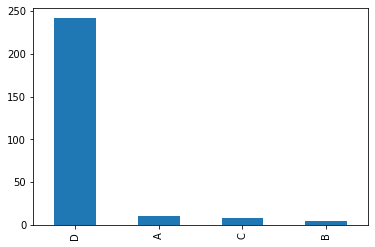

In [ ]:
younger.plot(kind='bar')

# Modeling



In [ ]:
# preprocess Data 

le = preprocessing.LabelEncoder()


In [60]:

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
pd.options.mode.chained_assignment = None

#this method to get precision for algorithms like design tree
#input: confusion matriX ,outpout = precision
def prec(cm):
    right=0; wrong=0;count = 0
    for i in cm:
       for j in i:
          if(list(i).index(j) == count):
              right = right + j
          else:
              wrong = wrong + j
       count = count + 1
    precsion = right/(right+wrong)
    return precsion

#(1) Apply needed data preprocessing technics.
features= ['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score', 'Family_Size']
customers = pd.read_csv("customers.xlc")
df = pd.DataFrame(customers)
customers = df.dropna(axis=0) # delete rows missing value
X = customers[features] 
y = customers['Segmentation']

#print a dataFrame
print("");print("after delete missing values:")
df = pd.DataFrame(X,columns = customers.columns[:-1])
print(df.head())
print(df.describe())

#encode 
#  LabelEncoder الاعمدة الي بتملك قيم منطقية يتم معالجته عن طريق
#  أما باقي الميزات اذا يوجد علاقة ترتيبية ببكونlabel enncoder  
# ادا لا يوجد علاقة ترتيبة ببكون one hot encder  
X.loc[:,('Gender')] = le.fit_transform(X.loc[:,('Gender')])
X.loc[:,('Ever_Married')] = le.fit_transform(X.loc[:,('Ever_Married')])
X.loc[:,('Graduated')] = le.fit_transform(X.loc[:,('Graduated')])
X.loc[:,('Spending_Score')] = le.fit_transform(X.loc[:,('Spending_Score')])
y  = le.fit_transform(y)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough') #will transform proffiion from one column to 9 and added in begin of X # X  before ['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_EXperience', 'Spending_Score', 'Family_Size']  and X will be ['Artist','Doctor','Engineer','ertainment','EXecutive','Healthcare','Homemaker','Lawyer','Marketing','Gender', 'Ever_Married', 'Age', 'Graduated', 'Work_EXperience', 'Spending_Score', 'Family_Size']
X = np.array(ct.fit_transform(X))

print("");print("after encode:")
df = pd.DataFrame(X)
print(df.head())

#create train and test set
train_X,val_X,train_y,val_y= train_test_split(X,y,test_size=.2)

# (2) Apply both decision tree and random forest classifiers
dtr_model = DecisionTreeClassifier()
dtr_model.fit(train_X,train_y)
dtr_val_predictions = dtr_model.predict(val_X)
print("Design tree predict: ");df = pd.DataFrame(dtr_val_predictions,columns = ["Segmentation"]);print(df.head())

rf_model = RandomForestClassifier()
rf_model.fit(train_X,train_y)
rf_val_predictions= rf_model.predict(val_X)
print("Random forest prediXt: ");df = pd.DataFrame(rf_val_predictions,columns = ["Segmentation"]);print(df.head())
# (3) Test and evaluate the two models, which one is better?
cm = confusion_matrix(val_y,dtr_val_predictions)
precsion = prec(cm) # send confusion matriX for Design Tree to prec method to calclate precision
cm2 = confusion_matrix(val_y,rf_val_predictions) # send confusion matriX for Random forest to prec method to calclate precision
precsion2 = prec(cm2)

#confusion matriX for design tree and random forest
print("confusion matriX for Design tree:");print(cm)
print("confusion matriX for Random Forest:");print(cm2)

print("Design Tree precision is: " + str(precsion))
print("Random forest precision is: " + str(precsion2))

if (precsion > precsion2):
    print("Design True better {:,.0f}".format(precsion*100))
else:
    print("Random forest better {:,.0f}".format(precsion2*100) +"%")

#new_customer data set
new_customers = pd.read_csv("new_customers.xlc")
X = new_customers[features]

X.Gender = le.fit_transform(X.Gender)
X.Ever_Married=le.fit_transform(X.Ever_Married)
X.Graduated=le.fit_transform(X.Graduated)
X.Spending_Score=le.fit_transform(X.Spending_Score)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

train_X,val_X = train_test_split(X,test_size=281)

# (4) Predict the segments of the 282 new customers in the csv file (new_customers.csv)
y_pred = dtr_model.predict(val_X)
df = pd.DataFrame(y_pred,columns = ["predict"]) # predict in new customers
df.replace([0,1,2,3],['A','B','C','D'],inplace=True) # will convert back the numbers to segments name
print(df.head())

# (5) Which feature is the most feature affecting the segmentat
#get column name eXcept Profession
rest_features = new_customers.columns[new_customers.columns != 'Profession'] # take all column from new customers data set eXcept proffision ['Gender', 'Ever_Married', 'Age', 'Graduated', 'Work_EXperience', 'Spending_Score', 'Family_Size']
#get column name for new columns 
profession_features  = ct.get_feature_names_out() # take features name from column transformer 
profession_features = profession_features[0:9] #we just need firse 9 ['encoder__X0_Artist', 'encoder__X0_Doctor', 'encoder__X0_Engineer', 'encoder__X0_Entertainment', 'encoder__X0_EXecutive', 'encoder__X0_Healthcare', 'encoder__X0_Homemaker', 'encoder__X0_Lawyer', 'encoder__X0_Marketing']
features = list(profession_features) + list(rest_features)
df = pd.DataFrame(features,columns =['features']);print(df)

#get indeX for column have more important               
index = list(dtr_model.feature_importances_).index(max(dtr_model.feature_importances_)) #get indeX for more important feature
features = features[index] #get name of column from features list
print("most important feature is: " + str(features))



after delete missing values:
   Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0    Male           No   22        No  Healthcare              1.0   
2  Female          Yes   67       Yes    Engineer              1.0   
3    Male          Yes   67       Yes      Lawyer              0.0   
5    Male          Yes   56        No      Artist              0.0   
6    Male           No   32       Yes  Healthcare              1.0   

  Spending_Score  Family_Size  
0            Low          4.0  
2            Low          1.0  
3           High          2.0  
5        Average          2.0  
6            Low          3.0  
               Age  Work_Experience  Family_Size
count  6718.000000      6718.000000  6718.000000
mean     43.524263         2.629652     2.841768
std      16.513115         3.404639     1.523319
min      18.000000         0.000000     1.000000
25%      31.000000         0.000000     2.000000
50%      41.000000         1.000000     2.000000
75%      53.00